# Lec07: scipy

In [2]:
import scipy as sp

arr = sp.array([1, 2, 3])

print(arr)

[1 2 3]


In [3]:
import numpy as np

np.polyfit is sp.polyfit        # 두 polyfit 함수가 같은 대상을 가리키는지 살펴본다


True

In [4]:
import scipy.fftpack

np.fft.fft is sp.fftpack.fft


False

In [35]:
import matplotlib as mpl

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['font.size'] =12

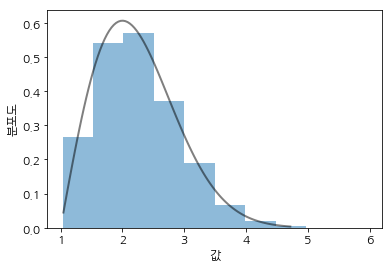

In [36]:
from scipy import stats
import matplotlib.pyplot as plt

rv = stats.rayleigh(loc=1) # 파라미터를 지정하여 분포 호출, 변수 ‘rv’에 동결
r = rv.rvs(size=3000) # 위의 통계 분포 함수로 확률 변수 생성
x = np.linspace(rv.ppf(0.001), rv.ppf(0.999), 100) #확률밀도 그래프를 위한 100개 점

plt.figure(1)
plt.clf()
plt.plot(x, rv.pdf(x), 'k-', alpha = 0.5, lw=2, label='확률밀도 함수')
plt.hist(r, normed =True, histtype='barstacked', alpha=0.5)
plt.xlabel('값')
plt.ylabel('분포도')
plt.show()

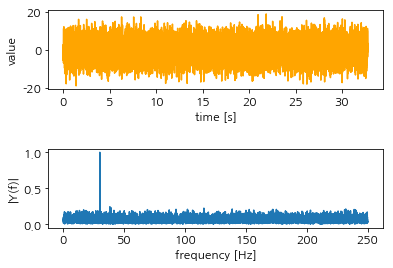

In [40]:
from scipy.fftpack import fft # scipy와는 별도로 import해야 함

Fs = 500 # 샘플링 주파수
T = 1/Fs # 샘플링 간격
L = 2**14 # 신호의 길이(샘플링 수)
t = sp.arange(L)*T # 시간 벡터
y = np.sin(2*np.pi*30*t) + 5*sp.randn(t.size) # 신호 생성

Y = sp.fftpack.fft(y, L)/L  # FFT 적용
f = (Fs/L)*sp.arange(L/2+1)   # 주파수 벡터를 구함

#원래의 시계열 데이터와 FFT로 주파수 분석을 거친 결과를 그래프로 그리기
plt.figure(1)
plt.subplot(2, 1, 1)
plt.plot(t, y, color = 'orange')
plt.xlabel('time [s]')
plt.ylabel('value')
plt.subplot(2, 1, 2)
plt.plot(f, 2*abs(Y[:L//2+1]))
plt.xlabel('frequency [Hz]')
plt.ylabel('|Y(f)|')
plt.show()
plt.subplots_adjust(hspace = 0.75)

In [41]:
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

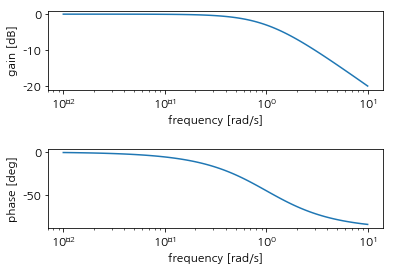

In [42]:
from scipy import signal # scipy와 별도로 import해야 한다.

s1 = sp.signal.lti([1], [1, 1]) # 선형 시스템을 정의

w, mag, phase = sp.signal.bode(s1) # bode 함수를 이용한 분석

# 보드 플롯 그리기
plt.figure(1)
plt.subplot(2, 1, 1)
plt.semilogx(w, mag)
plt.xlabel('frequency [rad/s]')
plt.ylabel('gain [dB]')
plt.subplot(2, 1, 2)
plt.semilogx(w, phase)
plt.xlabel('frequency [rad/s]')
plt.ylabel('phase [deg]')
plt.box('on')
plt.show()
plt.subplots_adjust(hspace = 0.75)

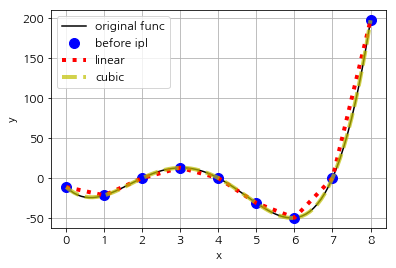

In [43]:
import scipy.interpolate as ipl 
# 보간으로 근사할 함수를 정의
def f(x):
    return (x-7)*(x-2)*(x+0.2)*(x-4)

# 정답 데이터 생성(틱 크기 0.1)
x = np.linspace(0, 8, 81)
y = np.array(list(map(f,x)))

# 보간 대상 데이터 생성(틱 크기 1)
x0 = np.arange(9)
y0 = np.array(list(map(f,x0)))

# 보간 함수를 설정 
f_linear = ipl.interp1d(x0, y0, bounds_error=False) # 선형
f_cubic = ipl.interp1d(x0, y0, kind='cubic', bounds_error=False)  # 3차 스플라인

# 보간 처리 실행
y1 = f_linear(x)
y2 = f_cubic(x)

# 보간 처리한 데이터와 정답 데이터의 비교를 위해 그래프 그리기
plt.figure(1)
plt.clf()
plt.plot(x, y, 'k-', label='original func')
plt.plot(x0, y0, 'bo', label='before ipl', markersize=10)
plt.plot(x, y1, 'r:', label='linear', linewidth=4)
plt.plot(x, y2, 'y--', label='cubic', linewidth=4, alpha=0.7)
plt.legend(loc='best') 
plt.xlabel('x')
plt.ylabel('y')
plt.grid('on') 
plt.show()


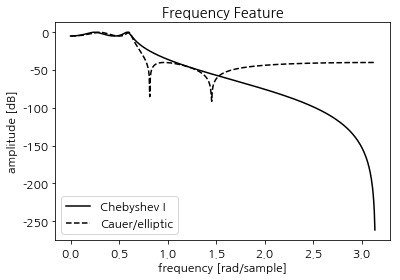

In [44]:
# 디지털 신호 필터 설계
import scipy.signal as signal # scipy와 별도로 import해야 함

# Chebyshev 1형 필터 설계
b1, a1 = signal.iirfilter(4, Wn=0.2, rp=5, rs=40, btype='lowpass', ftype='cheby1')
w1, h1 = signal.freqz(b1, a1)

# Cauer/elliptic 필터 설계
b2, a2 = signal.iirfilter(4, Wn=0.2, rp=5, rs=40, btype='lowpass', ftype='ellip')
w2, h2 = signal.freqz(b2, a2)

# 필터의 주파수 특성을 그리기
plt.title('Frequency Feature')
plt.plot(w1, 20*np.log10(np.abs(h1)), 'k-', label='Chebyshev I')
plt.plot(w2, 20*np.log10(np.abs(h2)), 'k--', label='Cauer/elliptic')
plt.legend(loc='best')
plt.ylabel('amplitude [dB]')
plt.xlabel('frequency [rad/sample]')
plt.show()

#### 행렬 분해

In [45]:
# QR Decomposition
from scipy import random, linalg, allclose

A = random.randn(4, 4) # 무작위 값으로 4*4 행렬 A를 생성
Q, R = linalg.qr(A) # 행렬 A를 QR 분해
print(allclose(A, np.dot(Q, R))) # A==QR인지 확인
print(R) # R이 상삼각행렬인지 확인

True
[[-2.01099829  1.31645513  0.71156392 -1.0254019 ]
 [ 0.          1.90907914 -1.04237897 -0.18260009]
 [ 0.          0.         -1.98063082  1.84706439]
 [ 0.          0.          0.         -2.17618232]]


In [46]:
# LU Decomposition
A = random.randn(4, 4)
P, L, U = linalg.lu(A) # A를 LU 분해한다.
print(allclose(A, P.dot(L.dot(U)))) # A==PLU인지 확인
print('P:', P, '\nL:', L, '\nU:', U) 

True
P: [[ 1.  0.  0.  0.]
 [ 0.  0.  0.  1.]
 [ 0.  0.  1.  0.]
 [ 0.  1.  0.  0.]] 
L: [[ 1.          0.          0.          0.        ]
 [-0.62951252  1.          0.          0.        ]
 [ 0.79017856  0.36943341  1.          0.        ]
 [-0.57042994 -0.32679262  0.23509528  1.        ]] 
U: [[-1.41327836 -1.74471404  0.42240139  2.2574695 ]
 [ 0.         -3.32846791  0.85785883  0.53729541]
 [ 0.          0.         -1.38706013 -1.07088123]
 [ 0.          0.          0.          1.85266531]]


In [47]:
# Cholesky Decomposition
A = sp.array([[2, -1.2j],[1.2j, 1]]) # 정부호 에르미트 행렬 A를 만듬
L = linalg.cholesky(A, lower=True) # Cholesky 분해
print(allclose(A, L.dot(L.T.conj()))) # A==LL*인지 확인
print(L) # L이 하삼각행렬인지 확인

True
[[ 1.41421356+0.j          0.00000000+0.j        ]
 [ 0.00000000+0.84852814j  0.52915026+0.j        ]]


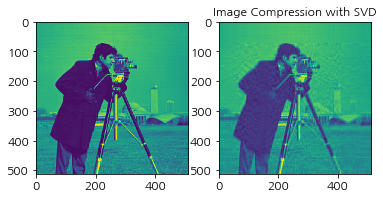

In [51]:
# SVD
# 필요한 라이브러리 import
# import numpy as np
# from scipy import linalg
from skimage import data
# import matplotlib.pyplot as plt

# `skimage`로부터 이미지 가져오기
img = data.camera()

# 특이값 개수 확인
linalg.svdvals(img)

# Singular Value Decomposition
U, sigma, V_T = linalg.svd(img)

# 32개의 특이값만을 사용(새로운 데이터 이름은 ‘A’로 한다)
A = np.dot(U[:,0:32], np.dot(np.diag(sigma[0:32]), V_T[0:32,:]))
plt.figure(1)

# 원래의 'img'를 표시(첫 번째 subplot)
plt.subplot(1, 2, 1)
plt.imshow(img)

# 'A'를 컬러로 표시(두 번째 subplot)
plt.subplot(1, 2, 2)
plt.imshow(A)
plt.title('Image Compression with SVD', fontsize=12, fontweight='bold')
plt.show()

#### EXERCISE QUESTIONS

#### 1.
* 1반과 2반 학생들의 성적이 각각 다음과 같다고 가정하자.
* 1반 : 80, 75, 85, 50, 60, 75, 45, 70, 90, 95, 85, 80
* 2반 : 80, 85, 70, 80, 35, 55, 80
* 1반의 실력이 2반보다 좋다고 이야기할 수 있는가? (단, 두 반의 점수는 각각 독립적인 정규분포를 따른다고 가정)


In [53]:
import scipy as sp
import scipy.stats as stats

x = sp.array([80, 75, 85, 50, 60, 75, 45, 70, 90, 95, 85, 80])
y = sp.array([80, 85, 70, 80, 35, 55, 80])
stats.ttest_ind(x, y)

Ttest_indResult(statistic=0.62301092655026402, pvalue=0.5415458608473267)

In [54]:
# pvalue > 0.05 so 
# we cannot reject the null that class 1 outperforms class 2.

#### 2.
* 어느 학급의 9월 성적과 10월 성적이 다음과 같다. 점수는 학생 번호 순으로 배열되어 있다.
* 9월 : 80, 75, 85, 50, 60, 75, 45, 70, 90, 95, 85, 80
* 10월: 90, 70, 90, 65, 80, 85, 65, 75, 80, 90, 95, 95
* 이 학급의 성적은 향상되었다고 이야기할 수 있는가? (단, 두 달의 점수는 각각 독립적인 정규분포를 따른다고 가정)

In [55]:
x = sp.array([80, 75, 85, 50, 60, 75, 45, 70, 90, 95, 85, 80])
y = sp.array([90, 70, 90, 65, 80, 85, 65, 75, 80, 90, 95, 95])
stats.ttest_rel(x, y)

Ttest_relResult(statistic=-2.6281127723493993, pvalue=0.023486192540203194)

In [56]:
# pvalue < 0.05 so
# we can reject the null that score increased under 5% significance level.

#### 3.
* 기대값이 각각 0, 0.5로 다르고 분산은 1으로 같으며, 개수가 100으로 같은 두 정규분포 샘플을 생성하고, 독립 표본 t-검정을 통해 두 집단의 기대값이 같은지 검정하라. (단, 결과는 생성된 샘플에 따라 달라질 수 있다.)

In [57]:
rv1 = stats.norm(0, 1)
x = rv1.rvs(100)
rv2 = stats.norm(0.5, 1)
y = rv2.rvs(100)

stats.ttest_ind(x, y)

Ttest_indResult(statistic=-3.3697491875477463, pvalue=0.00090435044075876006)

In [58]:
# pvalue < 0.05 thus we can reject the hypothesis that
# the means of two samples are identical under 5% significance level.